# <span style="color:orange">25/05 - Pair Test Estadísticos 1- Alicia y Lidia</span>

Es el momento de trabajar en parejas con los conceptos aprendidos en la lección de test estadísticos I. Los objetivos del pair programming de hoy son:
Cargad el csv de listings

In [252]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy.stats import skew 
from scipy.stats import kurtosistest 
from scipy import stats
from scipy.stats import kstest 
from scipy.stats import ks_2samp

In [253]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [254]:
df = pd.read_csv("./listings.csv", index_col=0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,59,1,81,2021-11-20,0.57,1,149,3,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.38,2,131,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,311,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,14,2021-11-29,0.16,1,167,4,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,154,2021-11-28,1.09,1,344,5,NaN



Eliminad las columnas latitude, longitude, last_review, license, name, host_id, neighbourhood, id y host_name ya que no serán útiles para nuestro propósito.

In [255]:
df.drop(["latitude", "longitude", "last_review", "license", "name", "host_id", "neighbourhood","id" , "host_name"], axis= 1, inplace=True)

In [256]:
#Comprobamos que las columnas han sido eliminadas correctamente
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [257]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,0.57,1,149,3
1,Latina,Private room,31,4,33,0.38,2,131,0
2,Arganzuela,Entire home/apt,50,15,0,NaN,6,311,0
3,Centro,Entire home/apt,92,5,14,0.16,1,167,4
4,Arganzuela,Private room,29,2,154,1.09,1,344,5


Explorad el dataset, para esto tendréis que usar métodos aprendidos hasta ahora, como el describe(), el info(), value_counts(), etc. También podréis hacer gráficas para empaparos mejor del dataset.

In [258]:
categoricas= df.select_dtypes(include="object")

In [259]:
#Datos estadísticos de las variables categoricas
categoricas.describe()

,neighbourhood_group,room_type
count,17606,17606
unique,21,4
top,Centro,Entire home/apt
freq,8048,10688


In [260]:
#Datos estadísticos de las variables numércias
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17606.000000,17606.000000,17606.000000,13593.000000,17606.000000,17606.000000,17606.000000
mean,106.527150,7.449279,36.328184,1.347131,11.622856,148.076622,6.598035
std,130.223339,36.375985,68.979754,1.574951,27.842846,139.668538,13.367240
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,0.240000,1.000000,0.000000,0.000000
50%,71.000000,2.000000,7.000000,0.810000,2.000000,104.000000,1.000000
75%,114.000000,3.000000,38.000000,1.940000,7.000000,308.000000,7.000000
max,1000.000000,1125.000000,767.000000,25.000000,199.000000,365.000000,347.000000


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17606 entries, 0 to 17830
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             17606 non-null  object 
 1   room_type                       17606 non-null  object 
 2   price                           17606 non-null  int64  
 3   minimum_nights                  17606 non-null  int64  
 4   number_of_reviews               17606 non-null  int64  
 5   reviews_per_month               13593 non-null  float64
 6   calculated_host_listings_count  17606 non-null  int64  
 7   availability_365                17606 non-null  int64  
 8   number_of_reviews_ltm           17606 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB


In [262]:
df.neighbourhood_group.value_counts()

Centro                   8048
Salamanca                1207
Chamberí                 1053
Arganzuela                972
Tetuán                    755
Carabanchel               610
Retiro                    607
Ciudad Lineal             523
Chamartín                 505
Moncloa - Aravaca         499
Latina                    482
Puente de Vallecas        477
San Blas - Canillejas     419
Hortaleza                 350
Fuencarral - El Pardo     271
Usera                     257
Villaverde                165
Barajas                   137
Moratalaz                 118
Villa de Vallecas          79
Vicálvaro                  72
Name: neighbourhood_group, dtype: int64

In [263]:
df.room_type.value_counts()

Entire home/apt    10688
Private room        6539
Shared room          234
Hotel room           145
Name: room_type, dtype: int64

In [264]:
numericas= df.select_dtypes(include=np.number)
numericas.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,59,1,81,0.57,1,149,3
1,31,4,33,0.38,2,131,0
2,50,15,0,NaN,6,311,0
3,92,5,14,0.16,1,167,4
4,29,2,154,1.09,1,344,5


    Hemos decidido hacer un boxplot para conocer los outliers y evaluar sí deberiamos reemplazarlos. 🤓

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb18eb4eb80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb18eb582e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb18eb4e7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb18eb58a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb18eb58d90>],
 'means': []}

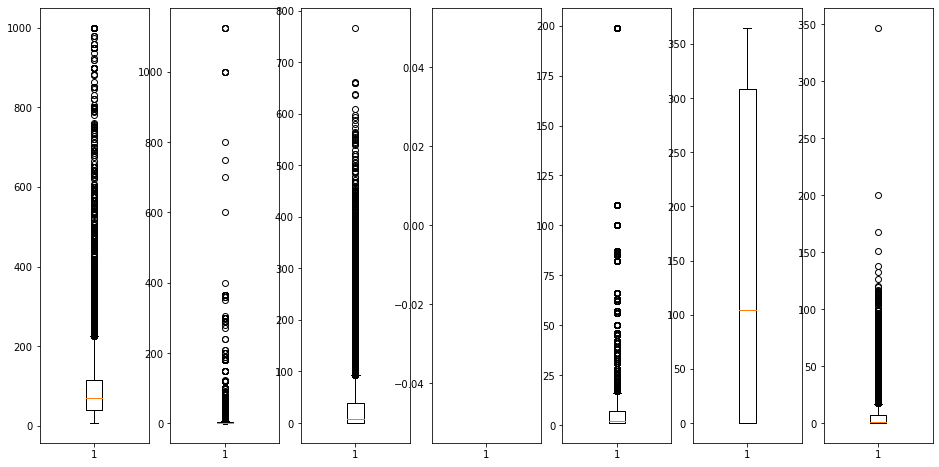

In [265]:
fig,ax = plt.subplots(1,7, figsize = (16,8))

caja_1 = numericas.loc[:,'price']
caja_2 = numericas.loc[:,'minimum_nights']
caja_3 = numericas.loc[:,'number_of_reviews']
caja_4 = numericas.loc[:,'reviews_per_month']
caja_5 = numericas.loc[:,'calculated_host_listings_count']
caja_6 = numericas.loc[:,'availability_365']
caja_7 = numericas.loc[:,'number_of_reviews_ltm']


ax[0].boxplot(caja_1)
ax[1].boxplot(caja_2)
ax[2].boxplot(caja_3)
ax[3].boxplot(caja_4)
ax[4].boxplot(caja_5)
ax[5].boxplot(caja_6)
ax[6].boxplot(caja_7)

    Ups, 'reviews_per_month' no aparece 🤔, hacemos una investigación para esa columna.

    El las demás columnas tenemos outliers, como vamos a utilizar "price" como variable respuesta, decidimos modificar estos outliers.

In [266]:
df.price.value_counts()

25     408
50     395
30     374
60     346
35     343
      ... 
395      1
657      1
374      1
635      1
463      1
Name: price, Length: 512, dtype: int64

    Hay precios demasiado bajo como 1€ por ejemplo,entonces vamos a cambiar aquellos valores por debajo de 20€ por la mediana del conjunto.

In [267]:
#Mediana del conjunto
df.price.median()

71.0

In [ ]:
# Aqui cambiamos el valor de todos aquellos menores de 20 por la mediana (71), como vemos arriba.
[df["price"].replace({x:71},inplace=True) for x in df.price if x <= 20]

In [270]:
#Comprobamos que no hay números menores de 20
df.price.unique()

array([  59,   31,   50,   92,   29,   85,   54,   83,   82,   52,   70,
         65,   80,   63,   55,   60,   71,  195,   75,   25,   41,  163,
         30,   21,   62,   51,   91,  105,   74,  286,  180,  211,   24,
         68,   61,  170,  120,   79,   77,   81,  110,   76,   42,  138,
        111,   87,   35,   67,   90,   96,  100,   46,   88,  102,  101,
         95,   56,  140,   84,  117,   69,   49,   93,   97,   73,   40,
         94,  103,   34,   48,  300,   39,   78,  190,  200,   33,   32,
         28,   26,   45,   64,   23,  314,  230,  166,  154,  169,   37,
        139,  109,  113,  126,  205,  165,   47,   89,   57,   66,  149,
         22,  220,   58,   72,  215,  136,  127,  132,  130,  222,  277,
        135,  134,  198,  112,   36,  510,  575,   99,  160,  104,   43,
         86,  118,  133,  115,  400,  129,  150,  122,  121,  137,  155,
        124,  161,  290,   27,  145,  114,  157,  107,  141,  106,  119,
        123,  339,  179,  196,  372,   53,  185,  1


📌 NOTA En caso de que haya algún nulo gestionad esos valores como aprendimos en las lecciones de limpieza.

In [271]:
# "reviews_per_month" es la única que tiene nulos
df.isnull().sum()

neighbourhood_group                  0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4013
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [272]:
#Vamos a hacer una copia, para no dañar nuestro DF con los siguientes pasos.
df_limpio =df.copy()

    Hemos decidido eliminar la columnas "reviews_per_month", ya que tras la exploración de outliers no hemos encontrado respuesta, y al comprobar los nulos, nos damos cuenta, que es la única con nulos en sus valores. Tampoco es una variable que vamos a usar en este momento y por ello vamos a descartar ahora.
    

In [273]:
del df_limpio["reviews_per_month"]

In [274]:
df_limpio.tail(2)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17829,Ciudad Lineal,Private room,71,2,0,4,24,0
17830,Carabanchel,Private room,33,1,0,14,358,0


Definid cuáles son las variables predictoras y la variable respuesta. Debéis tener en cuenta que lo que vamos a querer saber es de que depende el precio de las casas.

In [275]:
variable_respuesta= "price"
variables_predictoras= 'room_type'

Plantead una hipótesis alternativa. ¿Qué variables creeis que afectarán al precio de una casa?

    H1= el precio de la vivienda , depende de: 'neighbourhood_group', 'room_type'
    HO= el precio d ela vivienda, no depende de: 'neighbourhood_group', 'room_type'

Evaluad la normalidad de la variable respuesta. Hacedlo visualmente usando un histplot o un displot

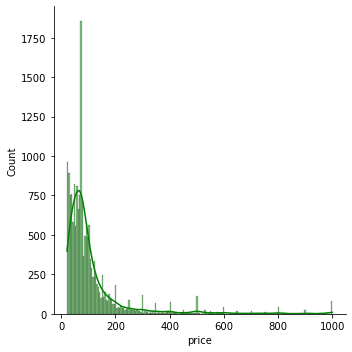

In [276]:
sns.displot(df_limpio["price"], kde = True, color = "green");

In [277]:
df_limpio.price.mean()

110.24241735771896

    Vemos que no tienen una distribución normal ya que no tiene forma campana de Gauss, la media no corresponde con la concentración de distribución de datos.
    Los datos están sesgados a la  izquierda con distribución asimetrica positiva donde la moda y mediana son menores que la media.

Evaluad la curtosis de las variables del dataset. ¿Qué tipo presenta cada variable?

In [278]:
kurtosistest(df_limpio.price)

KurtosistestResult(statistic=65.04183413364258, pvalue=0.0)

    statistic= 65.04183413364258 > 0 , es mayor que 0 , por lo que vemos una Lepocurtosis 

    pvalue = 0.0

    Sabemos que como *p-valor* es inferior al nivel de significación (es decir, 0.05, un intervalo de confianza del 95%), se puede rechazar la hipótesis nula de que los datos están distribuidos normalmente. 

    Rechazamos nuestra hipotisis nula de que el precio no se ve afectado por otras columnas 

    HO= el precio de la vivienda, no depende de: 'neighbourhood_group', 'room_type'


Como hemos eliminado algunas columnas, guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair programming.

In [281]:
df_limpio.to_csv("listing_nuevo.csv")